# Air Quality
Este projeto é parte da atividade “Projeto de Redes Neurais”, proposta no curso Udemy – Machine Learning com Python, e tem como objetivo aplicar e comparar diferentes abordagens de modelagem preditiva utilizando dados reais.

![Air Quality](https://raw.githubusercontent.com/claudiarpaim/Air-Quality/main/figures/capa.png)

**Nota:** Imagem gerada por Inteligência Artificial, utilizada exclusivamente para fins ilustrativos e educacionais.

## Introdução

O **monitoramento de contaminantes gasosos ambientais** é uma atividade estratégica para a indústria, órgãos reguladores e gestores ambientais, pois está diretamente relacionado à segurança operacional, ao cumprimento de normas ambientais e à proteção da saúde pública. 

Poluentes como monóxido de carbono, óxidos de nitrogênio e compostos orgânicos voláteis, como o benzeno, são frequentemente associados a **emissões veiculares e industriais**, exigindo controle contínuo e confiável. 

Sistemas de monitoramento baseados em sensores geram grandes volumes de dados operacionais que, quando analisados adequadamente, podem apoiar a tomada de decisão e a **prevenção de riscos ambientais**. 

Nesse cenário, técnicas de **Machine Learning** permitem transformar dados de sensores e variáveis meteorológicas em informações preditivas, contribuindo para o controle de emissões, otimização de processos e antecipação de situações críticas de poluição do ar.

## Objetivo do Projeto

O objetivo deste projeto é **desenvolver e comparar modelos de Machine Learning para a previsão da concentração real de benzeno** no ar a partir de dados de sensores ambientais e variáveis meteorológicas. Busca-se avaliar o desempenho de um modelo linear e de uma rede neural artificial, analisando sua capacidade preditiva e de generalização. 

## Dataset

O projeto utiliza o dataset **Air Quality**, que contém medições horárias de poluentes atmosféricos e variáveis meteorológicas coletadas por meio de sensores eletrônicos e analisadores de referência. Disponível no Kaggle e amplamente utilizado em estudos acadêmicos.

In [1]:
#Importando as Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import learning_curve
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.inspection import permutation_importance

In [2]:
# Carregando o Dataset
df = pd.read_csv('AirQualityUCI.csv', sep=';')

## Análise Exploratória dos Dados

In [3]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN


### Descrição dos Atributos

- **Date** – Data da obtenção dos dados
- **Time** - Horário
- **CO(GT)** - é a concentração real de monóxido de carbono no ambiente, medida por analisador de referência, expresso em (mg/m3).
- **PT08.S1(CO)** – refere-se à resposta média horária de um sensor de óxido de estanho (S1) monitorando monóxido de carbono (CO) em um dispositivo de qualidade do ar (PT08).
- **NMHC(GT)** - Concentração média horária real de hidrocarbonetos não metano em µg/m³ (analisador de referência).
- **C6H6(GT)** - Concentração média horária real de benzeno em µg/m³ (analisador de referência).
- **PT08.S2(NMHC)** – refere-se à resposta média horária do sensor que indica a medida indireta da concentração de hidrocarbonetos não metânicos baseada na resposta de um sensor de óxido de titânio (S2) em um dispositivo de qualidade do ar (PT08).
- **NOx(GT)** - Concentração média horária real de NOx em ppb (analisador de referência).
- **PT08.S3(NOx)** - refere-se à resposta média horária do sensor que indica a concentração de óxidos de nitrogênio (NOx) baseada na resposta de um sensor de óxido de tungstênio (S3) em um dispositivo de qualidade do ar (PT08).
- **NO2(GT)** - Concentração média horária real de NO2 em µg/m³ (analisador de referência).
- **PT08.S4(NO2)** - refere-se à resposta média horária do sensor que indica a concentração de óxidos de nitrogênio (NO2) baseada na resposta de um sensor de óxido metálico de alta sensibilidade (S4) em um dispositivo de qualidade do ar (PT08).
- **PT08.S5(O3)** - refere-se à resposta média horária do sensor que indica a concentração de ozônio (O3) baseada na resposta de um sensor de óxido metálico (S5) em um dispositivo de qualidade do ar (PT08).
- **T** – Temperatura em (°C)
- **RH** – Umidade Relativa (%)
- **AH** – Umidade Absoluta

In [4]:
df.shape

(9471, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [6]:
df['NMHC(GT)'].value_counts()

NMHC(GT)
-200.0    8443
 66.0       14
 40.0        9
 29.0        9
 88.0        8
          ... 
 422.0       1
 424.0       1
 339.0       1
 445.0       1
 307.0       1
Name: count, Length: 430, dtype: int64

In [7]:
df.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

#### Insigth
- Remover colunas 15 e 16 sem valores
- Alterar formato dos dados das colunas Date e Time
- Converter os dados das colunas CO(GT), C6H6(GT), T, RH, AH de vírgula decimal para float
- Remover as linhas com dados ausentes

## Pré-Processamento

### Remoção das colunas e linhas com todos os dados ausentes 

In [8]:
df = df.dropna(axis=1, how='all')

In [9]:
df = df.dropna()

In [10]:
df.isna().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

In [11]:
df.shape

(9357, 15)

#### Justificativa
Colunas contendo exclusivamente valores ausentes (Unnamed: 15 e Unnamed: 16) foram removidas, pois não representam variáveis válidas do processo de monitoramento da qualidade do ar. Em seguida, linhas com valores ausentes foram excluídas devido a falhas na aquisição dos dados pelos sensores.

### Conversão da Coluna Date para datetime

In [12]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

In [13]:
df['Date'].dtype

dtype('<M8[ns]')

In [14]:
df[['Date']].head()

,Date
0,2004-03-10
1,2004-03-10
2,2004-03-10
3,2004-03-10
4,2004-03-10


#### Justificativa
A variável Date foi convertida para o tipo datetime64[ns], adotando o padrão ISO (YYYY-MM-DD), garantindo consistência temporal e compatibilidade com as bibliotecas de análise e machine learning.

### Conversão da Coluna Time para formato correto

In [15]:
df['Time'] = pd.to_datetime(df['Time'], format='%H.%M.%S').dt.time

In [16]:
df['Time'].head()

0    18:00:00
1    19:00:00
2    20:00:00
3    21:00:00
4    22:00:00
Name: Time, dtype: object

### Criação da Coluna Datetime

In [17]:
# Fusão das Coluna Date e Time criando a coluna Datetime
df['Datetime'] = pd.to_datetime(
    df['Date'].astype(str) + ' ' + df['Time'].astype(str)
)

In [18]:
df[['Datetime']].head()

,Datetime
0,2004-03-10 18:00:00
1,2004-03-10 19:00:00
2,2004-03-10 20:00:00
3,2004-03-10 21:00:00
4,2004-03-10 22:00:00


#### Justificativa
A coluna Time, originalmente no formato texto com separador por ponto (HH.MM.SS), foi convertida corretamente para o tipo temporal. Em seguida, as colunas Date e Time foram combinadas para formar uma variável Datetime, permitindo análises cronológicas mais precisas.

### Remoção das Colunas Date e Time

In [19]:
df = df.drop(columns=['Date', 'Time'])

#### Justificativa
Após a adequação de atributos temporais relevantes, as colunas originais Date e Time foram removidas, uma vez que não são diretamente utilizadas como entradas em modelos de redes neurais.

### Conversão das Colunas com vírgula decimal para float

In [20]:
# criando uma lista das colunas para corrigir
colunas_com_virgula = ['CO(GT)', 'C6H6(GT)', 'T', 'RH', 'AH']
# Substituindo vírgula por ponto
for col in colunas_com_virgula:
    df[col] = (
        df[col]
        .str.replace(',', '.', regex=False)
        .astype(float)
    )

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CO(GT)         9357 non-null   float64       
 1   PT08.S1(CO)    9357 non-null   float64       
 2   NMHC(GT)       9357 non-null   float64       
 3   C6H6(GT)       9357 non-null   float64       
 4   PT08.S2(NMHC)  9357 non-null   float64       
 5   NOx(GT)        9357 non-null   float64       
 6   PT08.S3(NOx)   9357 non-null   float64       
 7   NO2(GT)        9357 non-null   float64       
 8   PT08.S4(NO2)   9357 non-null   float64       
 9   PT08.S5(O3)    9357 non-null   float64       
 10  T              9357 non-null   float64       
 11  RH             9357 non-null   float64       
 12  AH             9357 non-null   float64       
 13  Datetime       9357 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(13)
memory usage: 1.1 MB


### Análise da Distribuição das Variáveis 

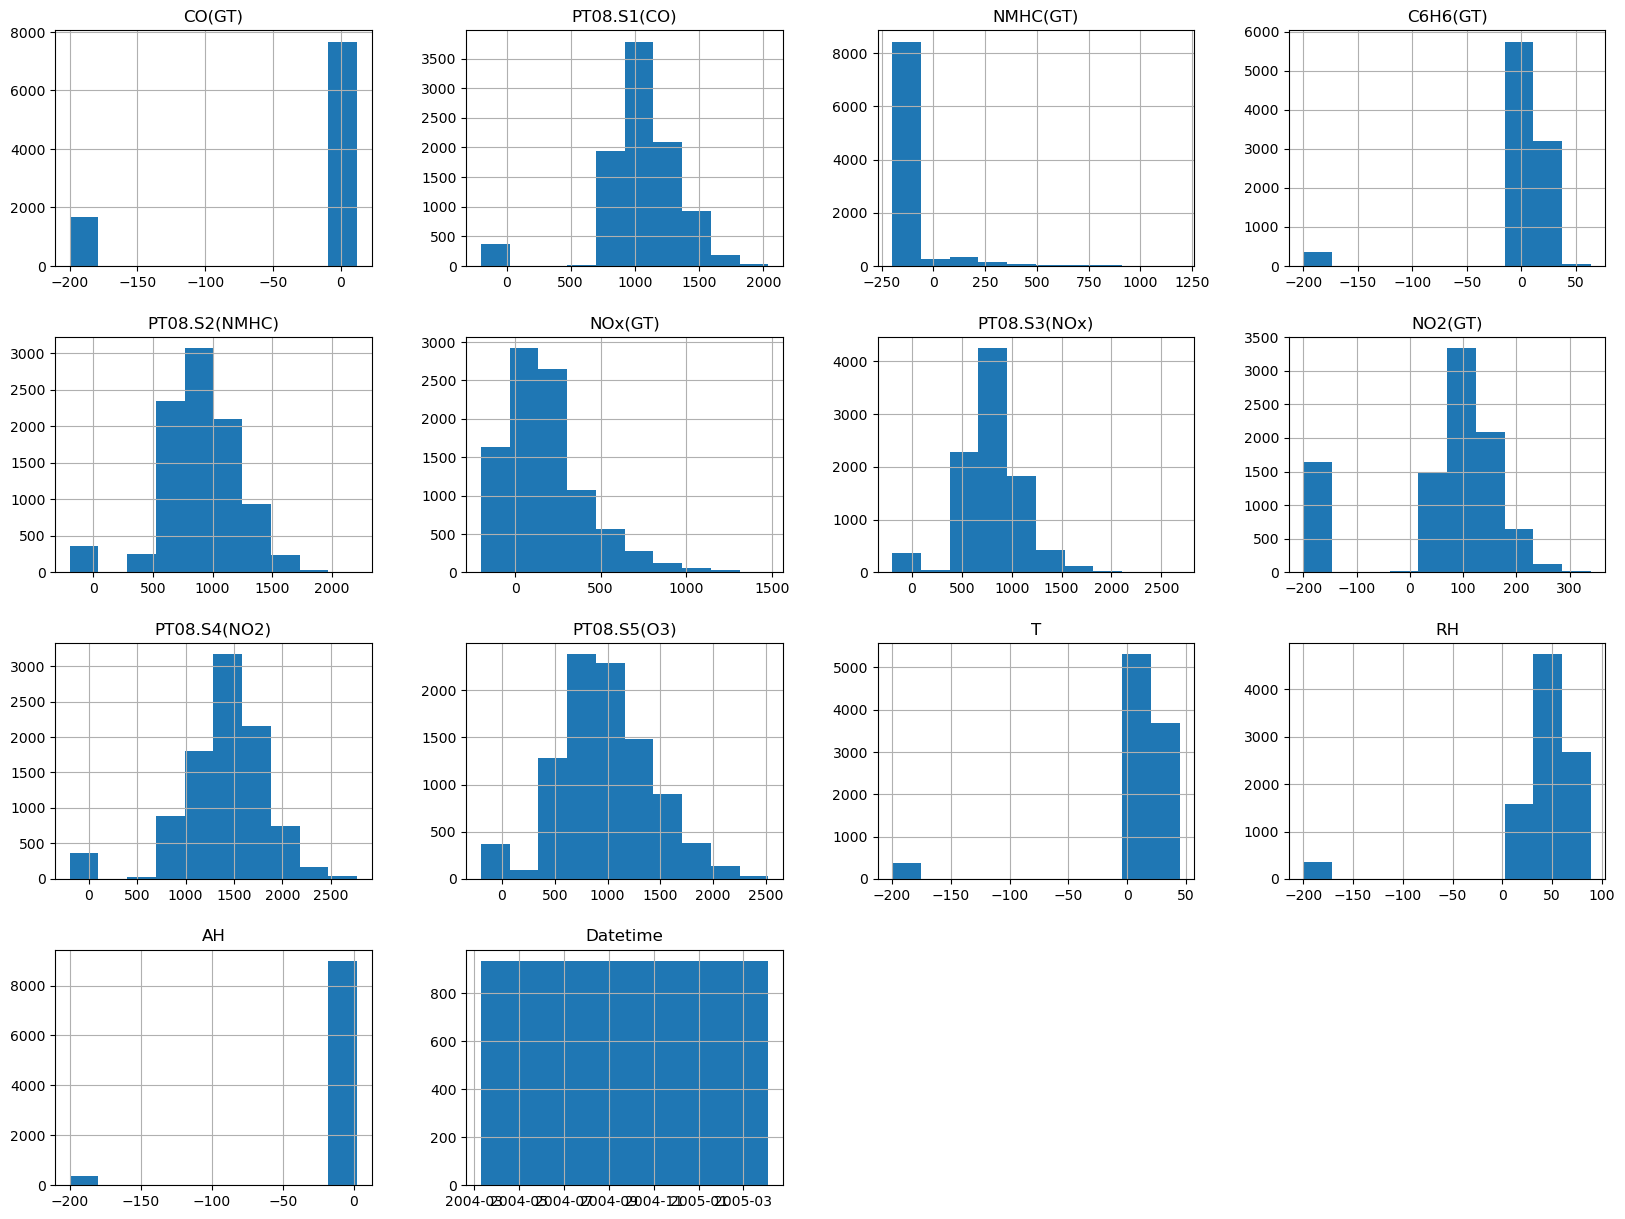

In [22]:
df.hist(figsize=(20,15), bins=10);

#### Insight
Através dos gráficos de distribuição das variáveis, observou-se a presença de valores extremos e incompatíveis com o domínio físico das variáveis, revelando a recorrência do valor -200, utilizado para indicar falhas de medição dos sensores.

Para a coluna do atributo NMHC(GT) observou-se a ocorrência de ausência massiva (>50%) dos dados.

### Conversão dos valores -200 em NAN

In [23]:
df = df.replace(-200, np.nan)

### Remoção da Coluna NMHC(GT)

In [24]:
df = df.drop(columns=['NMHC(GT)'])

### Imputação dos outros atributos ausentes pela mediana

In [25]:
# Selecionando somente as colunas numericas para imputar a mediana
colunas_numericas = df.select_dtypes(include=['number']).columns

imputer = SimpleImputer(strategy='median')
df[colunas_numericas] = imputer.fit_transform(df[colunas_numericas])

<Axes: >

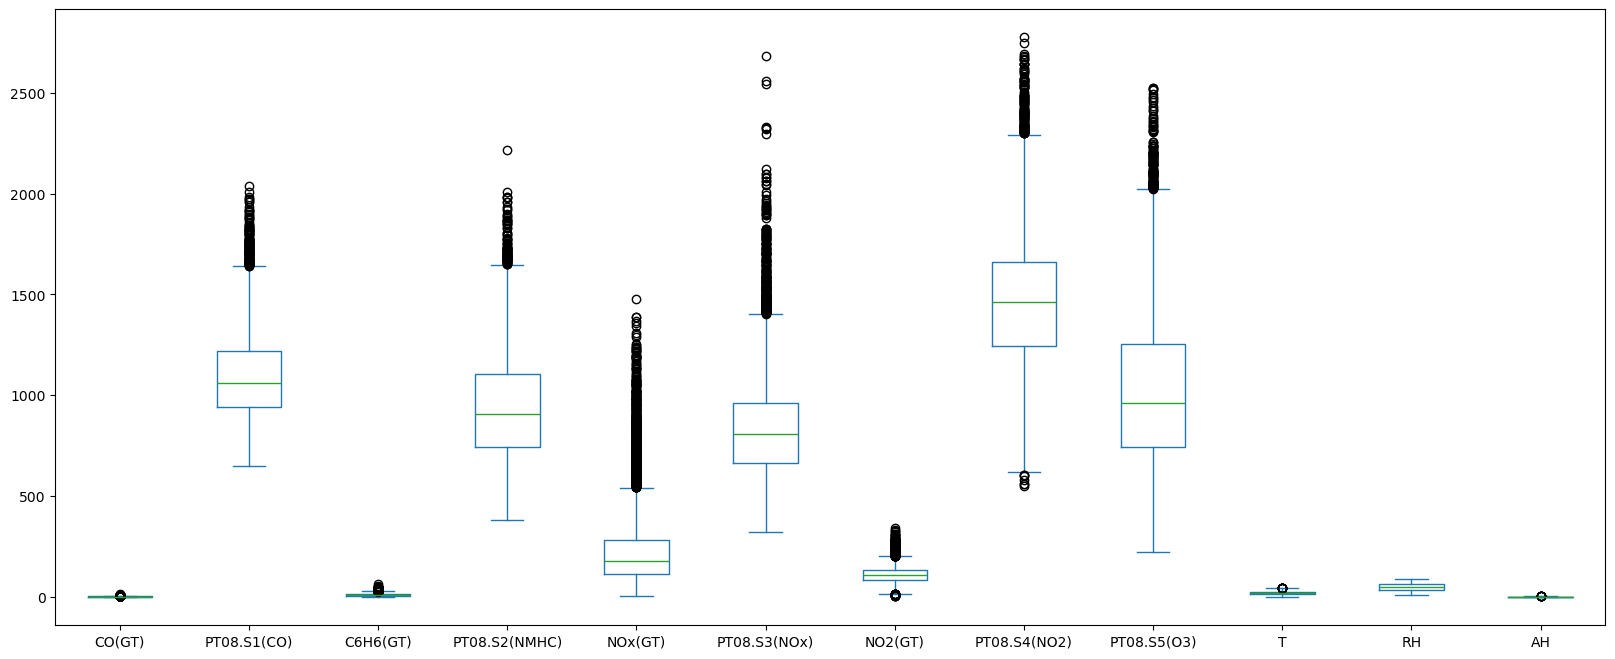

In [26]:
# Dataframe somente comas colunas numéricas
df_numerico = df.select_dtypes(include='number')
df_numerico.plot(kind='box', figsize=(20, 8), vert=True)

#### Insight
Após o tratamento desses valores, os dados foram novamente analisados por meio de boxplots, possibilitando a identificação de outliers reais e discrepâncias de escala entre as variáveis.

In [27]:
df.describe()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Datetime
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357
mean,2.089302,1098.392433,10.009447,937.973923,235.178903,834.339959,112.373303,1456.528054,1020.562894,18.297574,49.248509,1.024352,2004-09-21 16:00:00
min,0.100000,647.000000,0.100000,383.000000,2.000000,322.000000,2.000000,551.000000,221.000000,-1.900000,9.200000,0.184700,2004-03-10 18:00:00
25%,1.200000,941.000000,4.600000,743.000000,112.000000,666.000000,86.000000,1242.000000,742.000000,12.000000,36.600000,0.746100,2004-06-16 05:00:00
50%,1.800000,1063.000000,8.200000,909.000000,180.000000,806.000000,109.000000,1463.000000,963.000000,17.800000,49.600000,0.995400,2004-09-21 16:00:00
75%,2.600000,1221.000000,13.600000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000,24.100000,61.900000,1.296200,2004-12-28 03:00:00
max,11.900000,2040.000000,63.700000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000,2005-04-04 14:00:00
std,1.323024,212.911465,7.311771,261.625561,195.091025,251.808888,43.948519,339.370072,390.784960,8.658221,16.974949,0.395878,NaN


### Separação em Previsores e Alvo

In [28]:
# Benzeno - Alvo
X = df.drop(columns=['C6H6(GT)','Datetime'])
y = df['C6H6(GT)']

### Distribuição da variável alvo

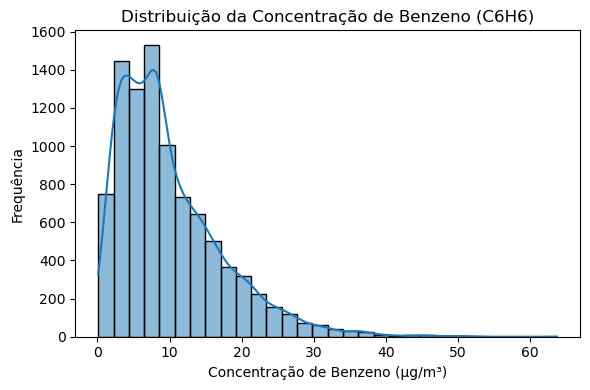

In [61]:
target = df['C6H6(GT)']

plt.figure(figsize=(6, 4))
sns.histplot(target, bins=30, kde=True)

plt.title('Distribuição da Concentração de Benzeno (C6H6)')
plt.xlabel('Concentração de Benzeno (µg/m³)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

#### Insight
A distribuição da variável alvo apresenta assimetria à direita, indicando maior concentração de valores baixos de benzeno e poucos episódios de concentração elevada. Esse comportamento é esperado em dados ambientais e justifica o uso de modelos capazes de capturar relações não lineares, como redes neurais artificiais.

In [29]:
X.shape

(9357, 11)

In [30]:
y.shape

(9357,)

#### Justificativa da escolha do benzeno como variável alvo
O benzeno (C6H6) é um composto orgânico volátil (VOC) amplamente emitido por fontes antropogênicas, como o tráfego veicular, atividades industriais e processos de combustão incompleta. Sua presença está associada à degradação da qualidade do ar urbano, especialmente em regiões densamente povoadas, tornando-o um indicador relevante da poluição atmosférica relacionada a atividades humanas. 
Do ponto de vista da saúde pública, o benzeno é reconhecido como um composto altamente tóxico e carcinogênico, classificado como cancerígeno do Grupo 1 pela Agência Internacional de Pesquisa em Câncer (IARC).
O benzeno possui limites regulatórios extremamente restritivos, refletindo seu elevado potencial de risco. Organismos internacionais e legislações ambientais, como a Organização Mundial da Saúde (OMS) e diretivas da União Europeia, estabelecem valores de referência anuais muito baixos para a concentração desse poluente no ar ambiente.

As variáveis preditoras incluem respostas dos sensores de óxido metálico, concentrações de gases correlacionados e variáveis meteorológicas, que influenciam diretamente a dinâmica dos poluentes atmosféricos.

A variável Datetime foi excluída da modelagem inicial por representar apenas informação temporal bruta, que não é diretamente interpretável por modelos de regressão linear ou redes neurais do tipo MLP. A inclusão de informações temporais exige engenharia de atributos específica para capturar padrões cíclicos e sazonais, o que será explorado em etapas futuras do estudo.

### Análise de Correlação

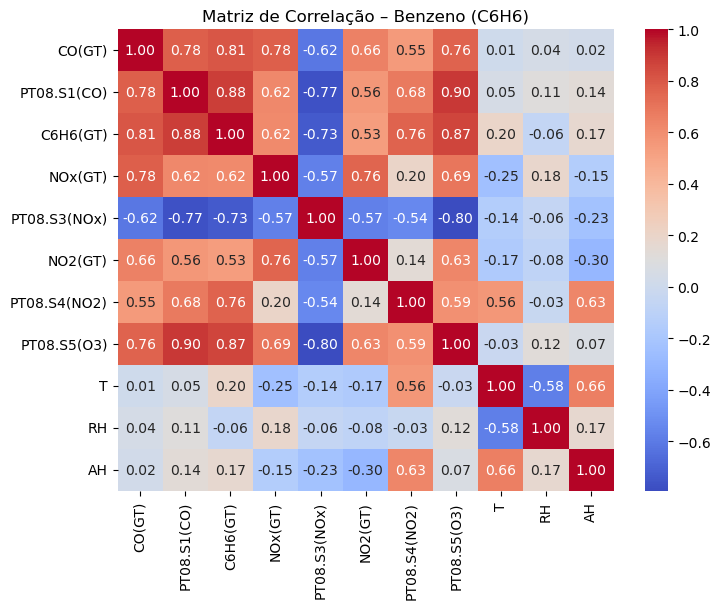

In [31]:
df_corr = df.drop(columns=['Datetime', 'PT08.S2(NMHC)'])

plt.figure(figsize=(8,6))
sns.heatmap(
    df_corr.corr(),
    annot=True,
    cmap='coolwarm',
    fmt=".2f"
)
plt.title('Matriz de Correlação – Benzeno (C6H6)')
plt.show()

#### Insight
A análise de correlação revelou forte associação positiva entre a concentração de benzeno (C6H6) e os sensores PT08.S2 (NMHC) e PT08.S1 (CO), indicando que esses sensores são altamente sensíveis à presença de compostos orgânicos voláteis. Variáveis meteorológicas apresentaram correlação mais fraca, sugerindo influência indireta sobre a concentração de benzeno.

### Divisão em TREINO/TESTE

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

### Escalonamento dos Atributos

In [33]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(7485, 11) (1872, 11)
(7485,) (1872,)


#### Justificativa
O escalonamento das variáveis foi realizado após a divisão dos dados em treino e teste, com o ajuste do StandardScaler exclusivamente no conjunto de treino. Essa abordagem evita vazamento de informação e garante uma avaliação realista da capacidade de generalização dos modelos. Embora o escalonamento não seja estritamente necessário para a regressão linear, ele foi aplicado para assegurar uma comparação justa com a rede neural, que é sensível à escala das variáveis.

## Modelagem

## Modelo Baseline: Regressão Linear

In [35]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

## Modelo Rede Neural (MLP)

In [50]:
# Construção do Modelo
model = Sequential([
    Input(shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compilação do Modelo
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)
# Estratégia de treinamento para evitar overfitting
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# Treinamento do Modelo
history = model.fit(
    X_train_scaled,
    y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

y_pred_mlp = model.predict(X_test_scaled).ravel()

Epoch 1/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 30.5512 - mae: 3.5124 - val_loss: 3.7303 - val_mae: 1.5159
Epoch 2/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.7520 - mae: 1.2108 - val_loss: 1.4039 - val_mae: 0.8910
Epoch 3/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1724 - mae: 0.7451 - val_loss: 0.5968 - val_mae: 0.5713
Epoch 4/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5864 - mae: 0.5159 - val_loss: 0.3273 - val_mae: 0.4063
Epoch 5/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3626 - mae: 0.3967 - val_loss: 0.2421 - val_mae: 0.3496
Epoch 6/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2712 - mae: 0.3317 - val_loss: 0.2344 - val_mae: 0.3475
Epoch 7/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2199 - mae: 0.2965 - val_loss: 0.1747 - val_mae: 0.3055
Epoch 8/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1824 - mae: 0.2820 - val_loss: 0.1400 - val_mae: 0.2602
Epoch 9/200
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms

## Métricas

### Avaliação do modelo de regressão linear

In [51]:
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print(f'Regressão Linear → RMSE: {rmse_lr:.3f}')
print(f'Regressão Linear → MAE: {mae_lr:.3f}')
print(f'Regressão Linear → R²: {r2_lr:.3f}')

Regressão Linear → RMSE: 1.181
Regressão Linear → MAE: 0.836
Regressão Linear → R²: 0.975


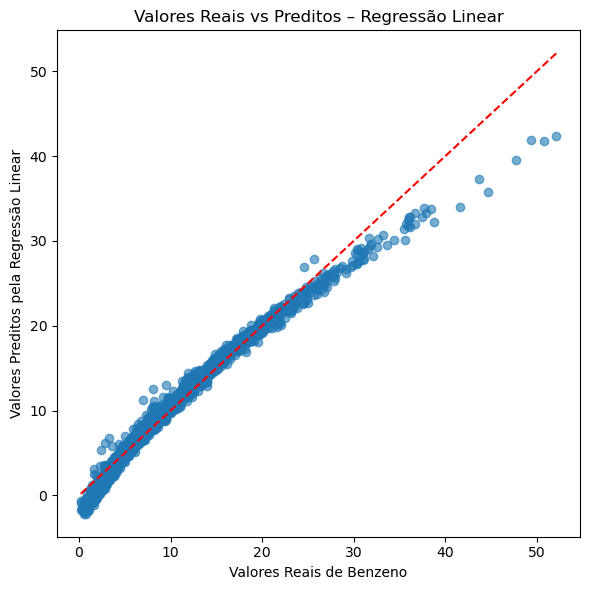

In [67]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6)

# Linha de referência (previsão perfeita)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle='--',
    color='red'
)

plt.xlabel('Valores Reais de Benzeno')
plt.ylabel('Valores Preditos pela Regressão Linear')
plt.title('Valores Reais vs Preditos – Regressão Linear')

plt.tight_layout()
plt.show()

### Avaliação do modelo de redes neurais

In [52]:
rmse_mlp = np.sqrt(mean_squared_error(y_test, y_pred_mlp))
mae_mlp = mean_absolute_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

print(f'MLP → RMSE: {rmse_mlp:.3f}')
print(f'MLP → MAE: {mae_mlp:.3f}')
print(f'MLP → R²: {r2_mlp:.3f}')

MLP → RMSE: 0.093
MLP → MAE: 0.057
MLP → R²: 1.000


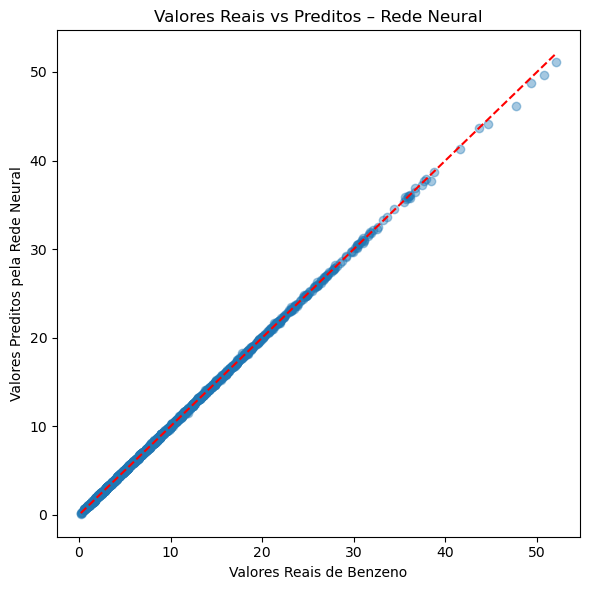

In [65]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_mlp, alpha=0.4)

# Linha de referência (previsão perfeita)
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    linestyle='--',
    color= 'red'
)

plt.xlabel('Valores Reais de Benzeno')
plt.ylabel('Valores Preditos pela Rede Neural')
plt.title('Valores Reais vs Preditos – Rede Neural')

plt.tight_layout()
plt.show()

#### Insight
Neste projeto, a Regressão Linear foi utilizada exclusivamente como modelo baseline, com o objetivo de estabelecer uma referência de desempenho e evidenciar os ganhos obtidos com o uso de redes neurais artificiais, que constituem o foco principal da atividade proposta no curso.

A rede neural apresentou boa capacidade de generalização, capturando relações não lineares complexas entre as respostas dos sensores e a concentração real de benzeno, ou seja, o bom desempenho se explica pela forte relação entre sensores e concentração de benzeno.

## Discussão dos Resultados

### Comparação direta (Baseline x MLP)

In [53]:
results = pd.DataFrame({
    'Modelo': ['Regressão Linear', 'MLP'],
    'RMSE': [rmse_lr, rmse_mlp],
    'MAE': [mae_lr, mae_mlp],
    'R²': [r2_lr, r2_mlp]
})

results

,Modelo,RMSE,MAE,R²
0,Regressão Linear,1.181182,0.836396,0.974607
1,MLP,0.093018,0.057397,0.999843


#### Conclusão

- A comparação entre os modelos de Regressão Linear e MLP evidenciou diferenças significativas de desempenho.
- A Regressão Linear apresentou resultados que indicam boa capacidade de explicação da variabilidade da variável alvo, porém com erros de previsão relativamente elevados.
- Em contrapartida, o modelo MLP obteve melhores resultados, demonstrando uma redução expressiva dos erros e um ajuste bem preciso aos dados.
- Esses resultados indicam que, embora existam relações lineares relevantes entre os atributos preditores e a variável alvo, a presença de padrões não lineares torna o MLP mais adequado para o problema em estudo.
- Com isso, os resultados reforçam que, para dados ambientais complexos e fortemente correlacionados, modelos não lineares tendem a ser mais adequados.

### Análise dos Resíduos

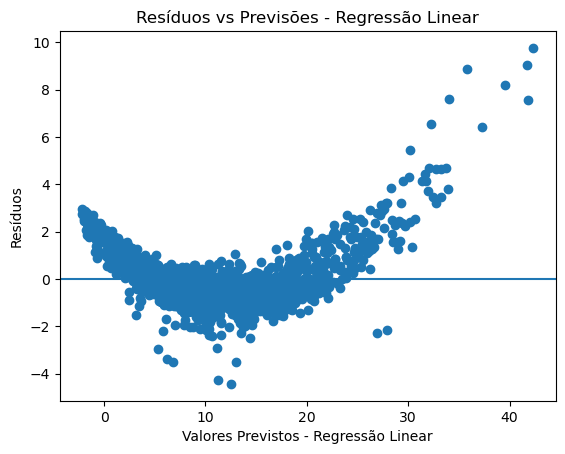

In [54]:
# Gráfico da Regressão Linear
residuos_lr = y_test - y_pred_lr

plt.figure()
plt.scatter(y_pred_lr, residuos_lr)
plt.axhline(0)
plt.xlabel("Valores Previstos - Regressão Linear")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Previsões - Regressão Linear")
plt.show()

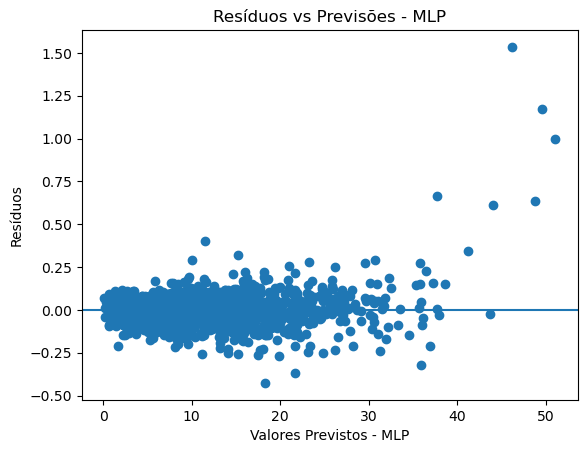

In [55]:
# Gráfico da Rede Neural
residuos_mlp = y_test - y_pred_mlp

plt.figure()
plt.scatter(y_pred_mlp, residuos_mlp)
plt.axhline(0)
plt.xlabel("Valores Previstos - MLP")
plt.ylabel("Resíduos")
plt.title("Resíduos vs Previsões - MLP")
plt.show()

#### Insight
A análise dos resíduos foi realizada com o objetivo de avaliar a adequação dos modelos e identificar possíveis padrões sistemáticos não capturados durante o treinamento.
Para a Regressão Linear, observou-se uma maior dispersão dos resíduos, indicando limitações do modelo em capturar relações mais complexas entre as variáveis preditoras e a variável alvo.
Em contrapartida, o modelo MLP apresentou resíduos mais concentrados em torno de zero, com distribuição mais estreita e comportamento predominantemente aleatório, evidenciando melhor capacidade de ajuste e generalização.
Esses resultados estão de acordo com as métricas de desempenho obtidas, reforçando a superioridade do modelo MLP para o problema em estudo.

### Avaliação Treino X Teste - Regressão Linear

In [56]:
# Previsão no treino/Teste
y_pred_lr_train = lr.predict(X_train_scaled)
y_pred_lr_test = lr.predict(X_test_scaled)

In [57]:
rmse_lr_tr = np.sqrt(mean_squared_error(y_train, y_pred_lr_train))
mae_lr_tr = mean_absolute_error(y_train, y_pred_lr_train)
r2_lr_tr = r2_score(y_train, y_pred_lr_train)

rmse_lr_te = np.sqrt(mean_squared_error(y_test, y_pred_lr_test))
mae_lr_te = mean_absolute_error(y_test, y_pred_lr_test)
r2_lr_te = r2_score(y_test, y_pred_lr_test)

results_lr = pd.DataFrame({
    'Comparação': ['Treino', 'Teste'],
    'RMSE': [rmse_lr_tr, rmse_lr_te],
    'MAE': [mae_lr_tr, mae_lr_te],
    'R²': [r2_lr_tr, r2_lr_te]
})

results_lr

,Comparação,RMSE,MAE,R²
0,Treino,1.145049,0.825522,0.975301
1,Teste,1.181182,0.836396,0.974607


### Avaliação Treino X Teste - MLP (Keras)

In [58]:
# Previsão no treino/Teste
y_pred_mlp_train = model.predict(X_train_scaled).ravel()
y_pred_mlp_test = model.predict(X_test_scaled).ravel()

234/234 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step


In [59]:
rmse_mlp_tr = np.sqrt(mean_squared_error(y_train, y_pred_mlp_train))
mae_mlp_tr = mean_absolute_error(y_train, y_pred_mlp_train)
r2_mlp_tr = r2_score(y_train, y_pred_mlp_train)

rmse_mlp_te = np.sqrt(mean_squared_error(y_test, y_pred_mlp_test))
mae_mlp_te = mean_absolute_error(y_test, y_pred_mlp_test)
r2_mlp_te = r2_score(y_test, y_pred_mlp_test)

results_mlp = pd.DataFrame({
    'Comparação': ['Treino', 'Teste'],
    'RMSE': [rmse_mlp_tr, rmse_mlp_te],
    'MAE': [mae_mlp_tr, mae_mlp_te],
    'R²': [r2_mlp_tr, r2_mlp_te]
})

results_mlp

,Comparação,RMSE,MAE,R²
0,Treino,0.071448,0.049550,0.999904
1,Teste,0.093018,0.057397,0.999843


#### Insight
A avaliação da capacidade de generalização dos modelos foi realizada por meio da comparação das métricas de desempenho nos conjuntos de treino e teste.
A Regressão Linear apresentou métricas semelhantes entre treino e teste, porém com valores de erro mais elevados, indicando estabilidade do modelo, porém, limitação estrutural na captura da complexidade dos dados.
O modelo MLP apresentou métricas de treino e teste próximas, com erros significativamente menores, evidenciando boa capacidade de generalização. O uso de early stopping contribuiu para o controle do overfitting, reforçando a robustez do modelo.

## Conclusão Final

Este projeto demonstrou a aplicação de modelos de **Machine Learning para a previsão da concentração de benzeno** a partir de dados de sensores ambientais e variáveis meteorológicas. A Regressão Linear apresentou desempenho consistente como modelo baseline, enquanto a rede neural MLP obteve resultados superiores, com menor erro e maior capacidade de capturar relações não lineares. Os resultados indicam que redes neurais são mais eficazes para modelar sistemas complexos de monitoramento da qualidade do ar. Dessa forma, o uso dessa técnica pode contribuir significativamente para o **apoio à tomada de decisão e ao controle de emissões** em contextos ambientais e industriais.

Apesar do excelente desempenho obtido, especialmente pela rede neural, é importante destacar que valores elevados de desempenho podem estar associados à forte correlação e possível redundância entre sensores e medições de referência presentes no dataset. Assim, para aplicações operacionais, recomenda-se **cautela na interpretação dos resultados** e a realização de avaliações adicionais, como validação em diferentes períodos, testes de robustez frente a falhas de sensores e atualização contínua do modelo com novos dados. Essas etapas são fundamentais para garantir a confiabilidade e a sustentabilidade do modelo em cenários reais de monitoramento ambiental.
